### Exercise implementation and workflow
<br>
Below are the SQLite queries that used for creating and updating new table to select and filter specific dataset so they matches with the analysis. After that, all the tables and dataset then are exported as csv file.

### SQLite queries:
<ol>

<li>
create table country_summary as
<br>select cast((julianday(end_date)-julianday(start_date)+1) as integer) as count_day,
<br>strftime('%Y-%m', start_date) as start_date,
<br>sum(total_spend) as total_spend_campaign, country
<br>from campaigns
<br>group by start_date, country
<br>order by country</li><br>

<li>update country_summary set country = 'glob' where country = ""</li><br>

<li>create table country_spend as select country,
<br>sum(count_day) as count_day,
<br>sum(total_spend_campaign) as country_spend
<br>from country_summary
<br>group by country</li><br>

<li>create table summary2017 as select strftime('%Y-%m', transaction_date) as date_ ,
<br>sum(total_buy) as total_buy, sum(total_sell) as total_sell, 
<br>sum(total_deposits) as total_deposits, sum(total_withdrawals) as total_withdrawals, 
<br>sum(count_contracts) as count_contracts, 
<br>sum(count_deposits) as count_deposits,  
sum(count_withdrawals) as count_withdrawals
<br>from transactions
<br>where strftime('%Y', transaction_date) == '2017' 
<br>group by date_ order by date_ asc</li><br>

<li>create table summary2018 as select strftime('%Y-%m', transaction_date) as date_ ,
<br>sum(total_buy) as total_buy,
<br>sum(total_sell) as total_sell, 
<br>sum(total_deposits) as total_deposits, 
<br>sum(total_withdrawals) as total_withdrawals,
<br>sum(count_contracts) as <br>count_contracts, 
<br>sum(count_deposits) as count_deposits,
<br>sum(count_withdrawals) as count_withdrawals  
from transactions
<br>where strftime('%Y', transaction_date) == '2018'
<br>group by date_ order by date_ asc</li><br>

<li>create table total_coupon as select indication_coupon,
<br>count(indication_coupon) as total_coupon 
<br>from clients
<br>group by indication_coupon 
<br>order by total_coupon desc</li><br>

<li>create table total_coupon_by_type as select type,
<br>count(type) as total_type 
<br>from clients
<br>group by type</li>
</ol>

<br>
#### Import related library

In [1]:
import csv
import pandas as pd
import numpy as np

#### Load all csv file into dataframe
<br>There are six csv file that are created from the initial analysis which are:
<ol>
    <li>country_summary.csv</li>
    <li>country_spend.csv</li>
    <li>summary2017.csv</li>
    <li>summary2018.csv</li>
    <li>total_type.csv</li>
    <li>total_coupon.csv</li>
    </ol>
    
<i>p/s: Further infomartion kindly refer the csv files that are provided </i>

In [2]:
df = pd.DataFrame()

df_country_spend = pd.read_csv('country_spend.csv')
df_country_summary = pd.read_csv('country_summary.csv')
df_type = pd.read_csv('total_type.csv')
df_coupon = pd.read_csv('total_coupon.csv')
df_summary_2017 = pd.read_csv('summary2017.csv')
df_summary_2018 = pd.read_csv('summary2018.csv')

#### Table summary 2017

In [3]:
df_summary_2017 = df_summary_2017.rename(columns={'date_':'month'})
df_summary_2018 = df_summary_2018.rename(columns={'date_':'month'})
df_summary_2017

,month,total_buy,total_sell,total_deposits,total_withdrawals,count_contracts,count_deposits,count_withdrawals
0,2017-01,567133.82,446768.38,1409551.93,2.774569e+07,45971,213,33
1,2017-02,1927294.06,1478999.12,1649743.77,4.211454e+07,64580,278,34
2,2017-03,1622311.88,1229419.88,1530848.43,6.587336e+07,97188,302,54
3,2017-04,1353882.48,1016814.57,1667941.33,8.256000e+07,119186,357,73
4,2017-05,1305476.04,1013965.63,1459918.14,8.305491e+07,113266,333,77
5,2017-06,1595408.91,1220778.49,1693807.41,6.286743e+07,103597,355,69
6,2017-07,1661856.63,1287002.13,1459770.20,7.503533e+07,115195,292,57
7,2017-08,3260480.06,2526178.53,2032171.92,9.822799e+07,148594,378,84
8,2017-09,3842380.93,2950365.91,2023462.55,1.027751e+08,196423,401,107
9,2017-10,4620284.69,3622614.51,2454934.86,1.141720e+08,226526,479,115


<br>
#### Graph visualization
<br>The graph visualization can be included with:<br><br>
<li>Plot comparison on total monthly spending and earning in 2017</li>
<li>Plot comparison on total number of sold items and deposits by monthly in 2017</li>
<li>Line plot on total number of sold items by monthly in 2017</li>

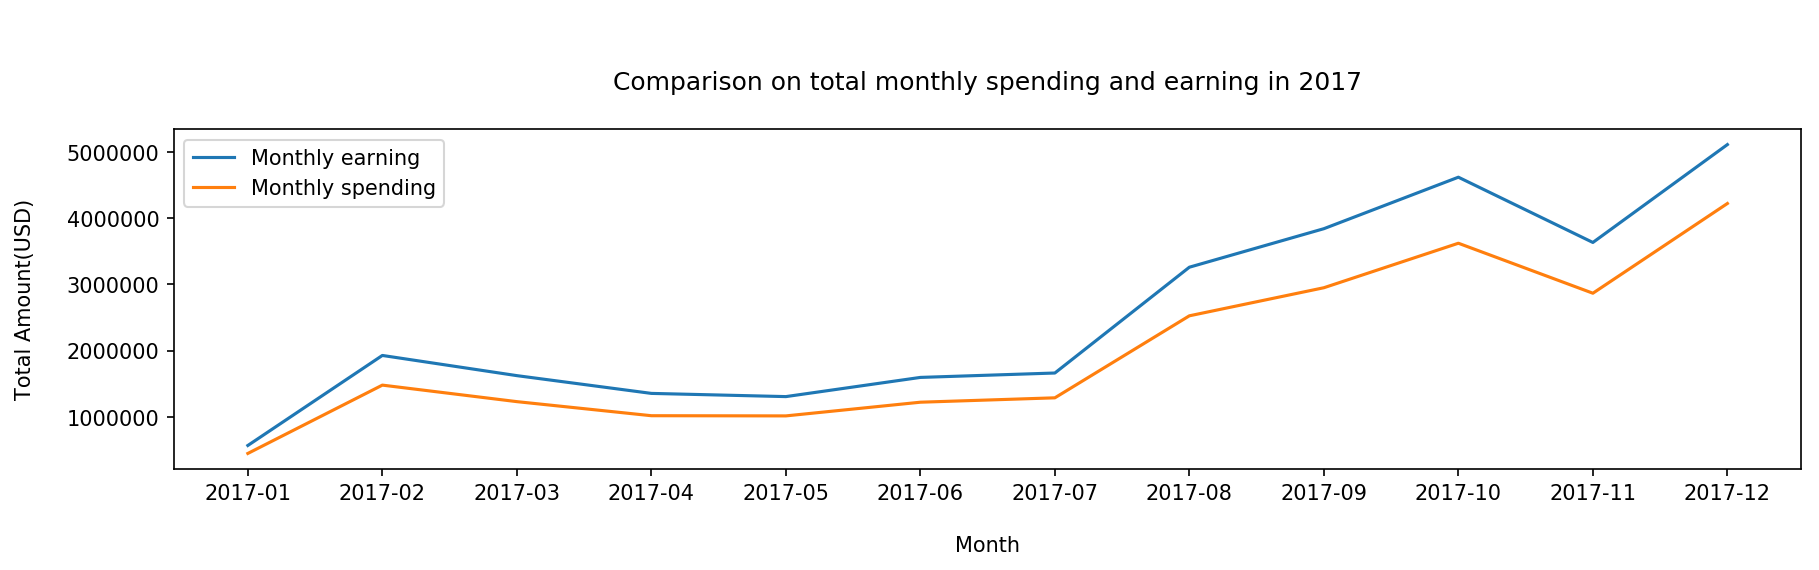

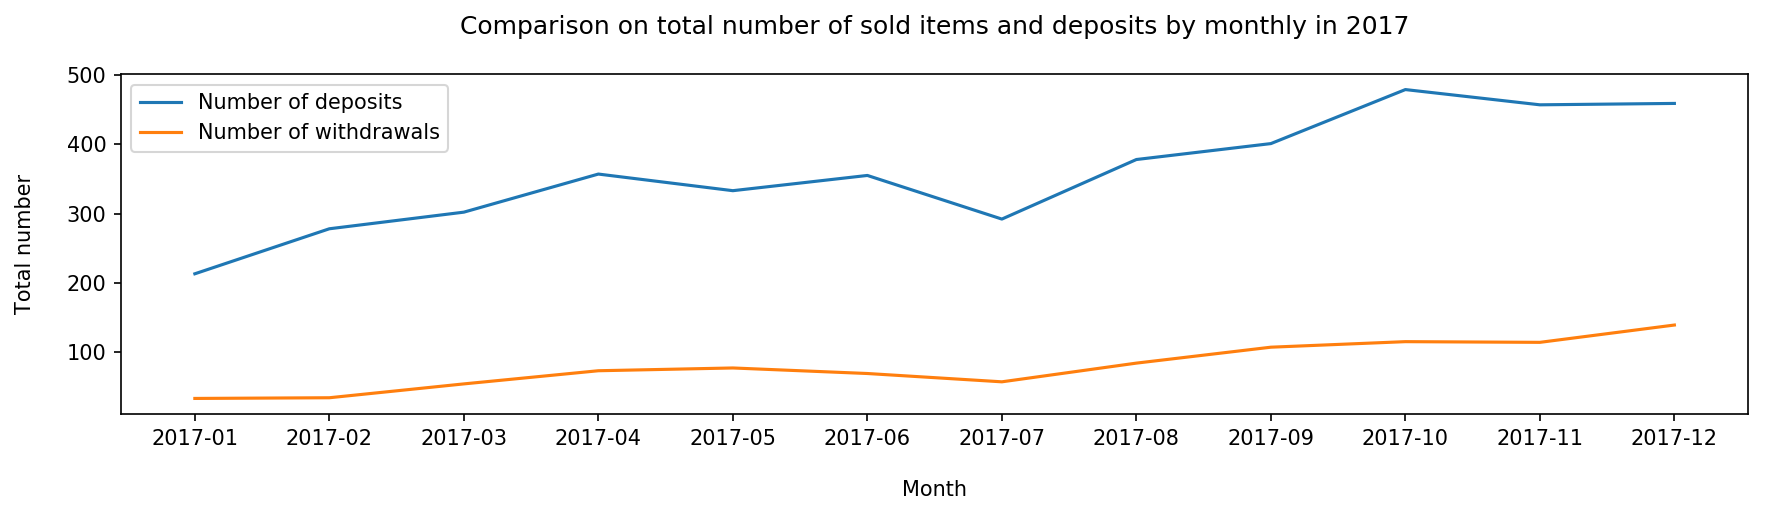

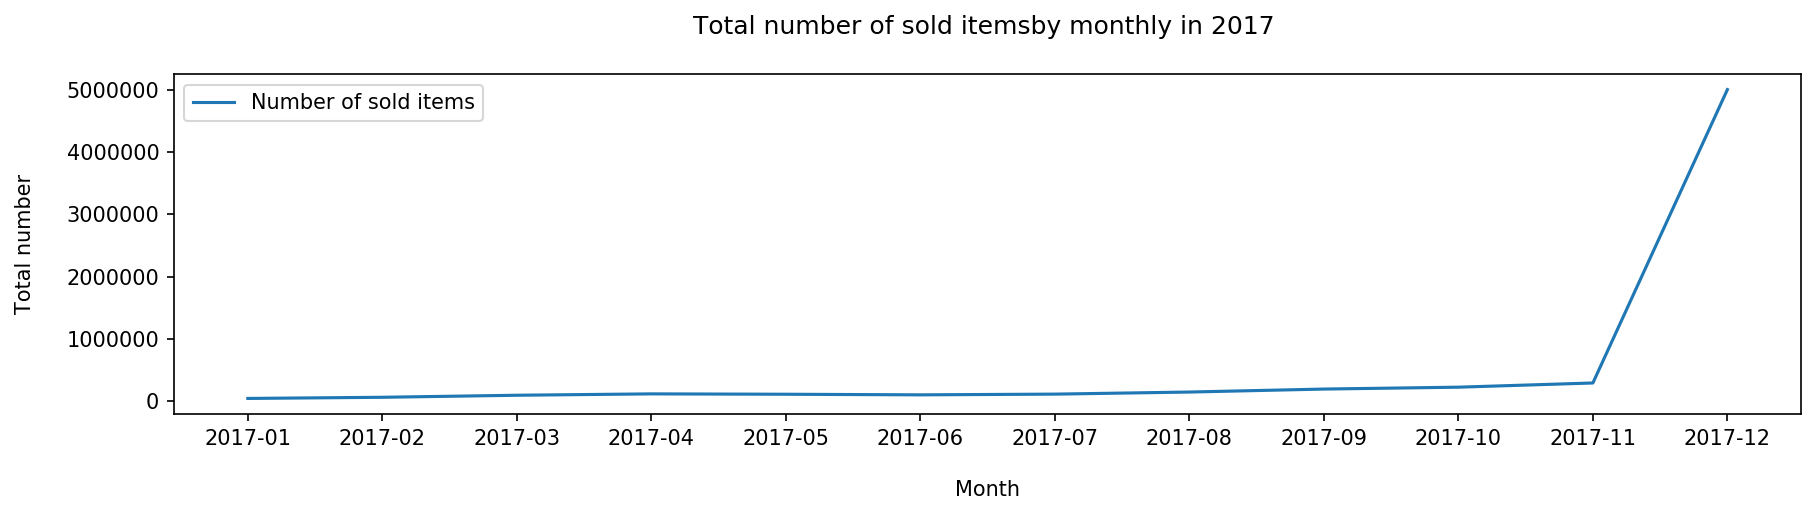

In [15]:
import matplotlib.pyplot as plt

x = np.arange(len(df_summary_2017))
plt.figure(dpi=150, figsize=(14,3))
plt.plot(df_summary_2017['total_buy'], label = 'Monthly earning')
plt.plot(df_summary_2017['total_sell'], label = 'Monthly spending')
plt.title('\n\nComparison on total monthly spending and earning in 2017\n')
plt.ylabel('Total Amount(USD)\n')
plt.xlabel('\nMonth')
plt.xticks(x,df_summary_2017['month'])
plt.legend()
plt.show()

plt.figure(dpi=150, figsize=(14,3))
plt.plot(df_summary_2017['count_deposits'], label = 'Number of deposits')
plt.plot(df_summary_2017['count_withdrawals'], label = 'Number of withdrawals')
plt.title('Comparison on total number of sold items and deposits by monthly in 2017\n')
plt.ylabel('Total number\n')
plt.xlabel('\nMonth')
plt.xticks(x,df_summary_2017['month'])
plt.legend()
plt.show()

plt.figure(dpi=150, figsize=(14,3))
plt.plot(df_summary_2017['count_contracts'], label = 'Number of sold items')
plt.title('Total number of sold itemsby monthly in 2017 \n')
plt.ylabel('Total number\n')
plt.xlabel('\nMonth')
plt.xticks(x,df_summary_2017['month'])
plt.legend()
plt.show()

#### Findings 
<p>All graphs above are depict the visualization of analysis in 2017. Firstly, we can see the monthly earning amount are always over the monthly spending amount which it can be concluded that no losses occured throughout the year. The trend of both monthly earning and spending are increased steadily towards the end of the year. Next, as might be seen, there is also a huge gap or margin between monthly total number of deposits and withdrawals. For the number of sold items in months 2017 shows that there is a clear upwards for every following months and suprisingly it rocketed sharply from November towards the end of the year. <br><br></p>

#### Table summary 2018

In [5]:
df_summary_2018

,month,total_buy,total_sell,total_deposits,total_withdrawals,count_contracts,count_deposits,count_withdrawals
0,2018-01,4052911.94,3066265.26,2352826.13,71471098.61,181919,405,116
1,2018-02,4554337.63,3489883.08,3150403.13,55985433.01,223651,460,103
2,2018-03,5121658.46,3940578.46,3069685.63,63438645.78,257489,526,136
3,2018-04,3404038.12,2542899.46,3110202.70,52452615.82,157175,578,126
4,2018-05,3949632.75,3051914.38,2796439.44,50995591.17,281475,487,143
5,2018-06,2745091.16,2051640.91,2749928.32,41326980.95,239451,514,126
6,2018-07,2096526.65,1584851.35,2659850.90,37672421.25,345126,659,409
7,2018-08,2718876.26,2085885.78,2931155.12,36036846.62,252244,589,146
8,2018-09,6255984.18,4765294.37,3769412.36,36796622.11,294430,714,208
9,2018-10,5193411.44,3935903.78,3238025.12,34909862.12,264827,680,224


<br>
#### Graph visualization
<br>The graph visualization can be included with:<br><br>
<li>Plot comparison on total monthly spending and earning in 2018</li>
<li>Trend on total deposits amount by monthly in 2018</li>
<li>Trend on total withdrawal amount by monthly in 2018</li>
<li>Line plot on total number of sold items by monthly in 2018</li>

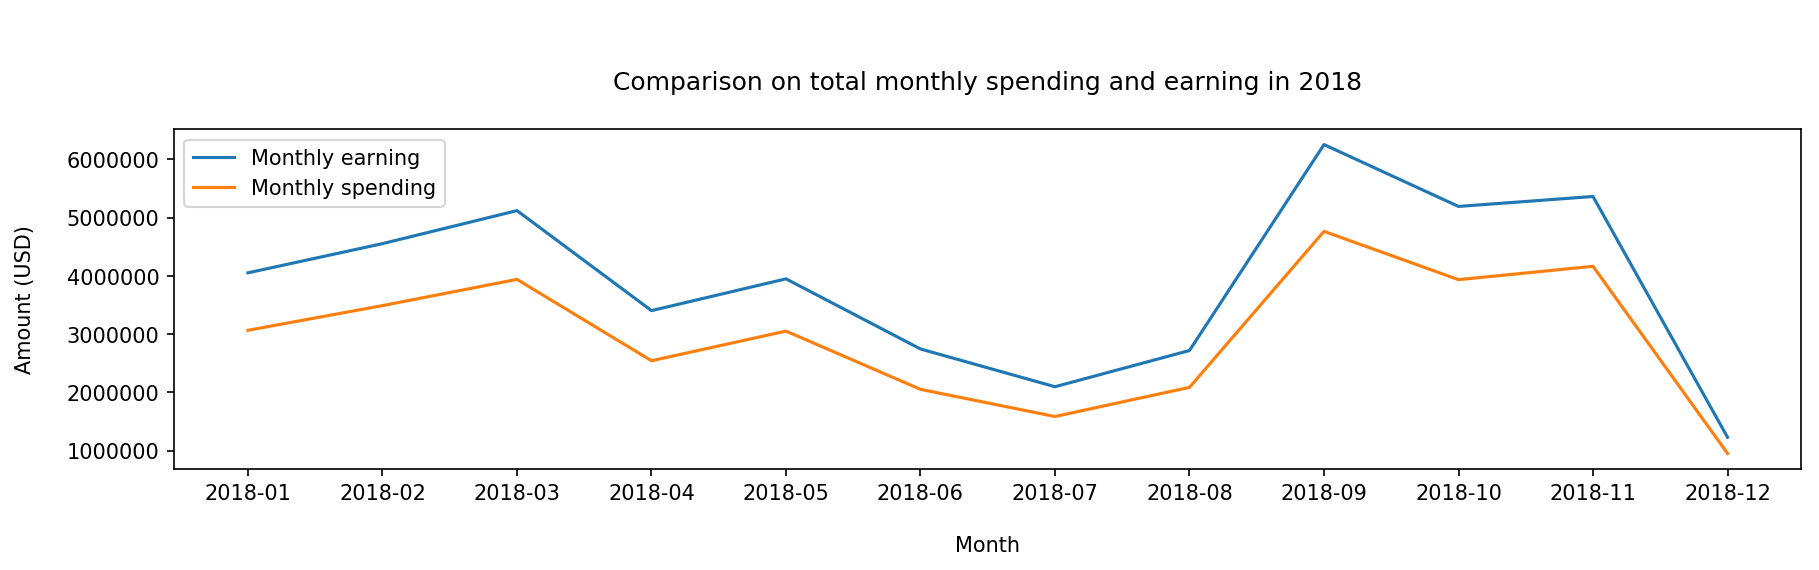

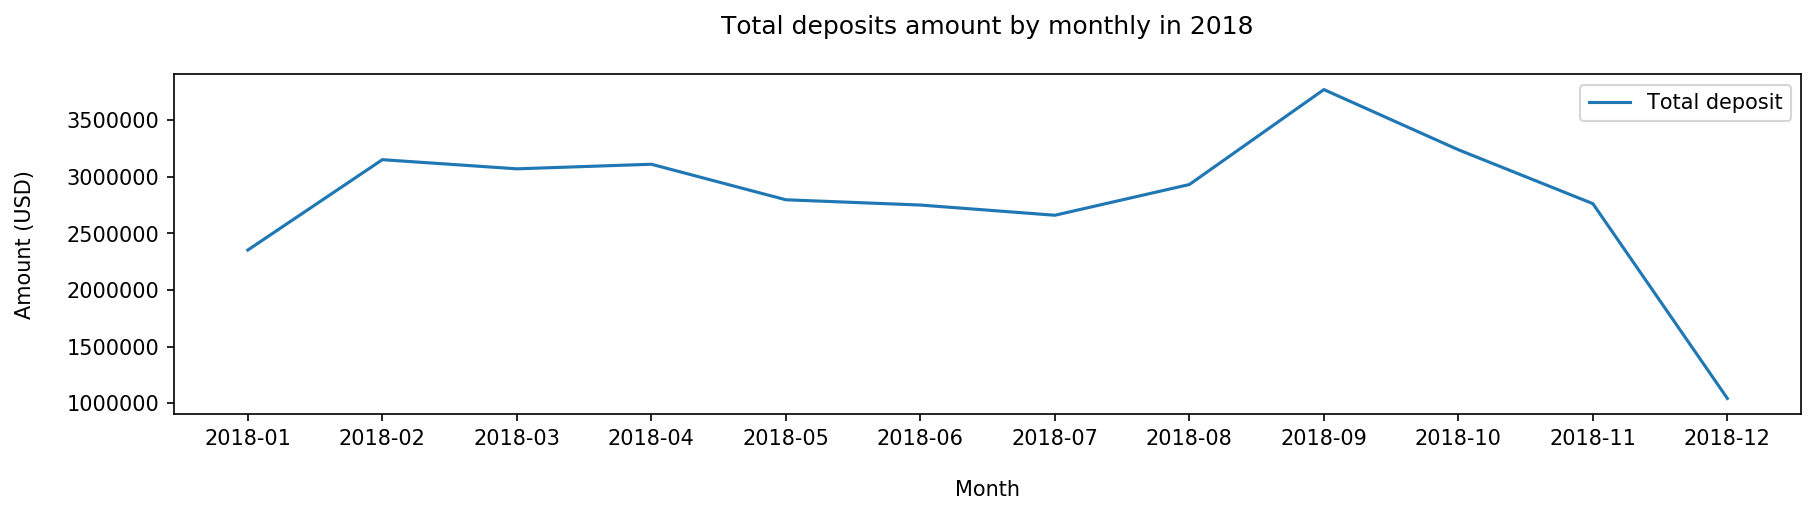

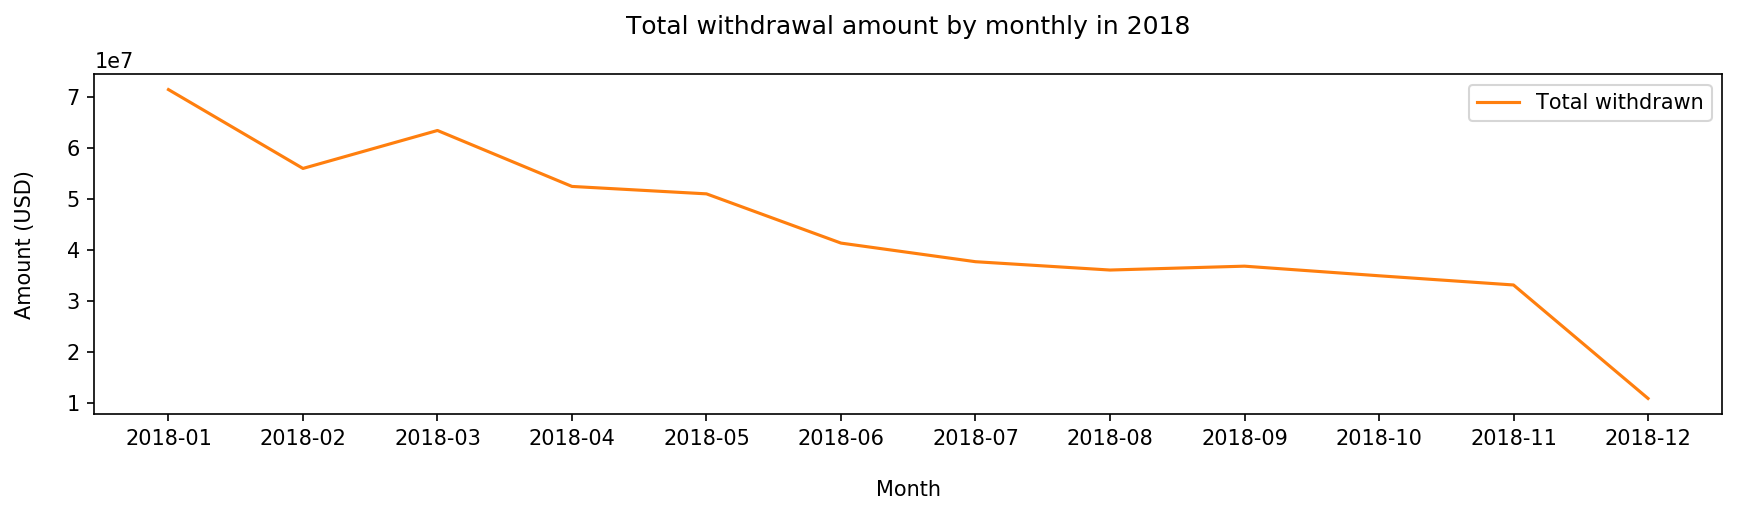

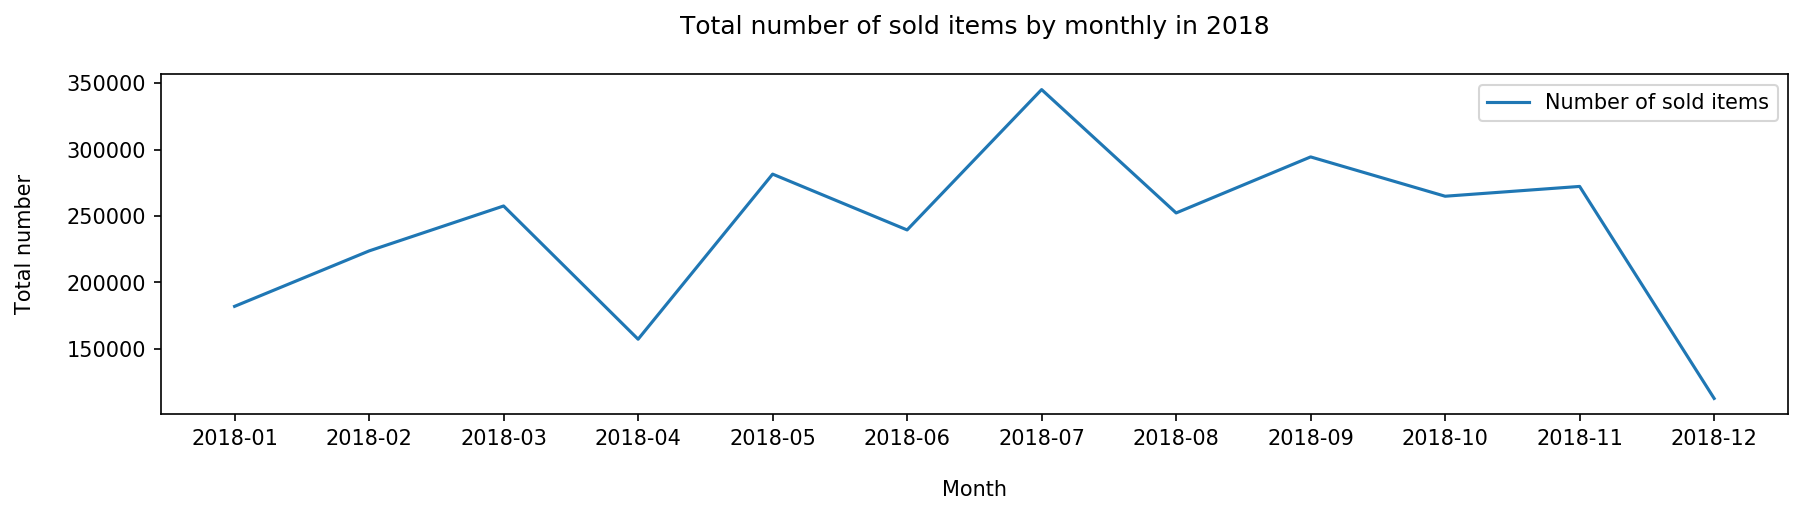

In [6]:
plt.figure(dpi=150, figsize=(14,3))
plt.plot(df_summary_2018['total_buy'], label = 'Monthly earning')
plt.plot(df_summary_2018['total_sell'], label = 'Monthly spending')
plt.title('\n\nComparison on total monthly spending and earning in 2018\n')
plt.ylabel('Amount (USD)\n')
plt.xlabel('\nMonth')
plt.xticks(x,df_summary_2018['month'])
plt.legend()
plt.show()

plt.figure(dpi=150, figsize=(14,3))
plt.plot(df_summary_2018['total_deposits'], label = 'Total deposit')
plt.title('Total deposits amount by monthly in 2018\n')
plt.ylabel('Amount (USD)\n')
plt.xlabel('\nMonth')
plt.xticks(x,df_summary_2018['month'])
plt.legend()
plt.show()

plt.figure(dpi=150, figsize=(14,3))
plt.plot(df_summary_2018['total_withdrawals'], label = 'Total withdrawn', color='#ff7f0e')
plt.title('Total withdrawal amount by monthly in 2018\n')
plt.ylabel('Amount (USD)\n')
plt.xlabel('\nMonth')
plt.xticks(x,df_summary_2018['month'])
plt.legend()
plt.show()

plt.figure(dpi=150, figsize=(14,3))
plt.plot(df_summary_2018['count_contracts'], label = 'Number of sold items')
plt.title('Total number of sold items by monthly in 2018\n')
plt.ylabel('Total number\n')
plt.xlabel('\nMonth')
plt.xticks(x,df_summary_2018['month'])
plt.legend()
plt.show()



#### Findings
<p>Graphs above represent the visualization of analysis in 2018. From the graph comparison on total monthly spending, earnings, deposits and withdrawals in 2018 as demonstrated, both trends decline with a little fluctuation from January until July. However, it seen to increase rapidly to September and somehow plunge steeply towards the end of year. The trend is shown similar with the total deposits amount. However, the total withdrawal amounts seems to be much different, which clearly the plot trend only declines gradually towards the end of the year. Besides that, the total number of sold items graph depicts a fluctuate trend with a steeply fallen started from November. As the result, each graph stated December where as the lowest score in a whole year. <br><br></p>

<br>
#### Total day and  spending by country

In [7]:
df_day = df_country_spend.sort_values(by=['count_day'], ascending = False).reset_index(drop=True)
df_total_spend = df_country_spend.sort_values(by=['country_spend'], ascending = False).reset_index(drop=True)

df_total_spend

,country,count_day,country_spend
0,id,39,184919.92
1,br,14,47229.13
2,ru,12,40109.58
3,ng,17,35351.00
4,ua,4,27302.04
5,glob,5,25001.35
6,in,5,22541.26
7,ph,4,18207.38
8,gb,1,16954.21
9,py,5,16661.93


<br>
#### Barchart visualization on total campaign day and total expenses spending in each country 

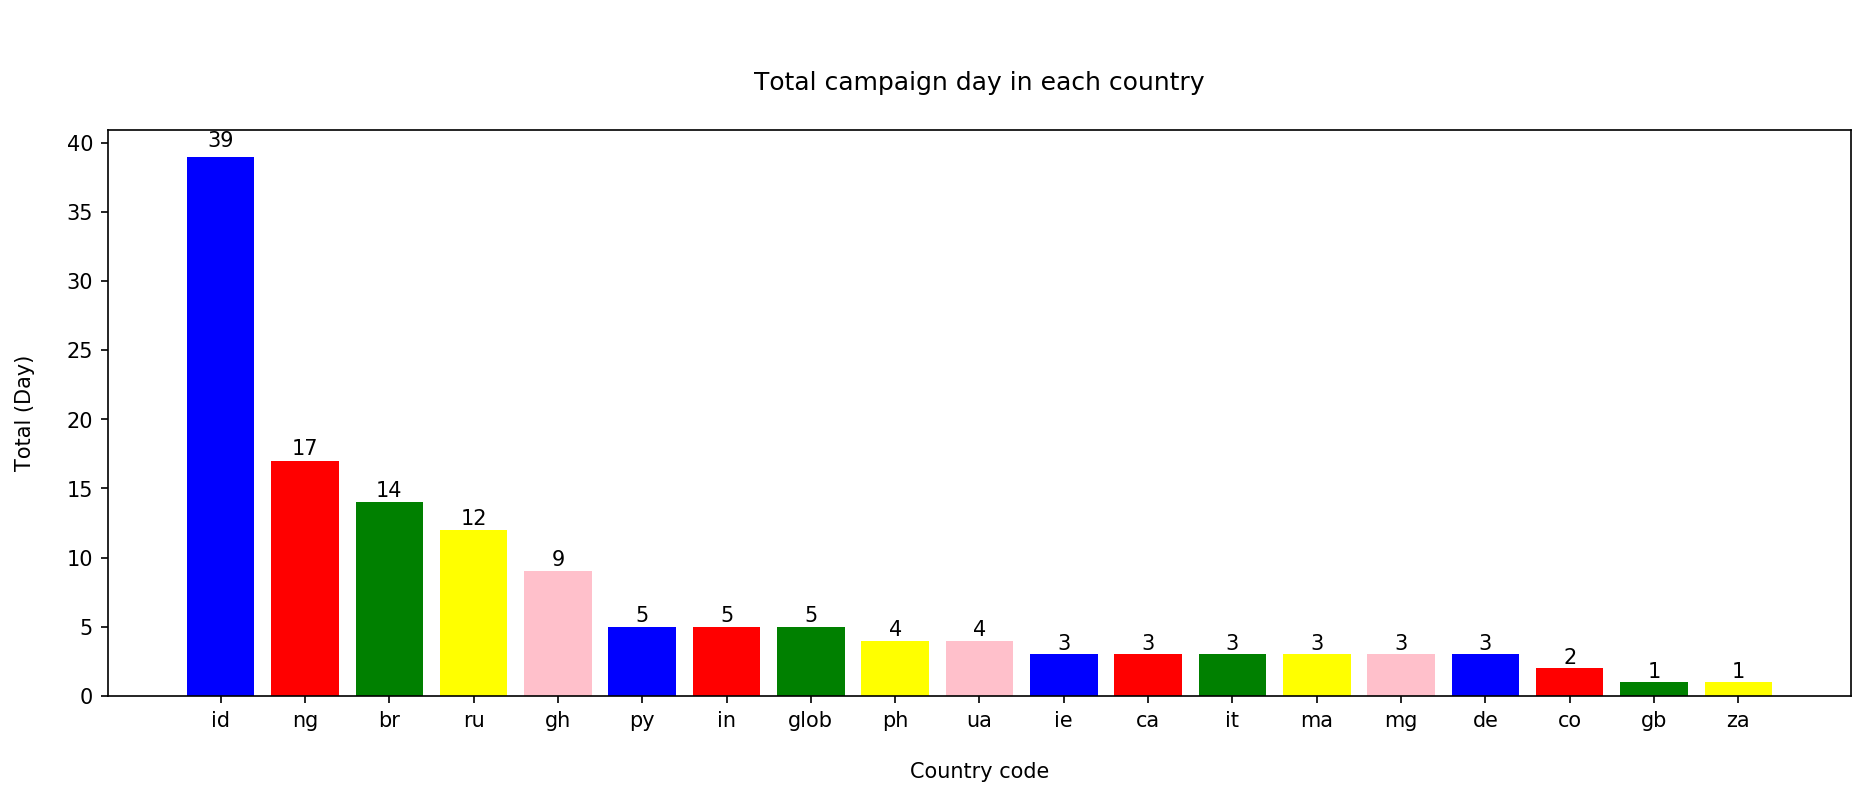

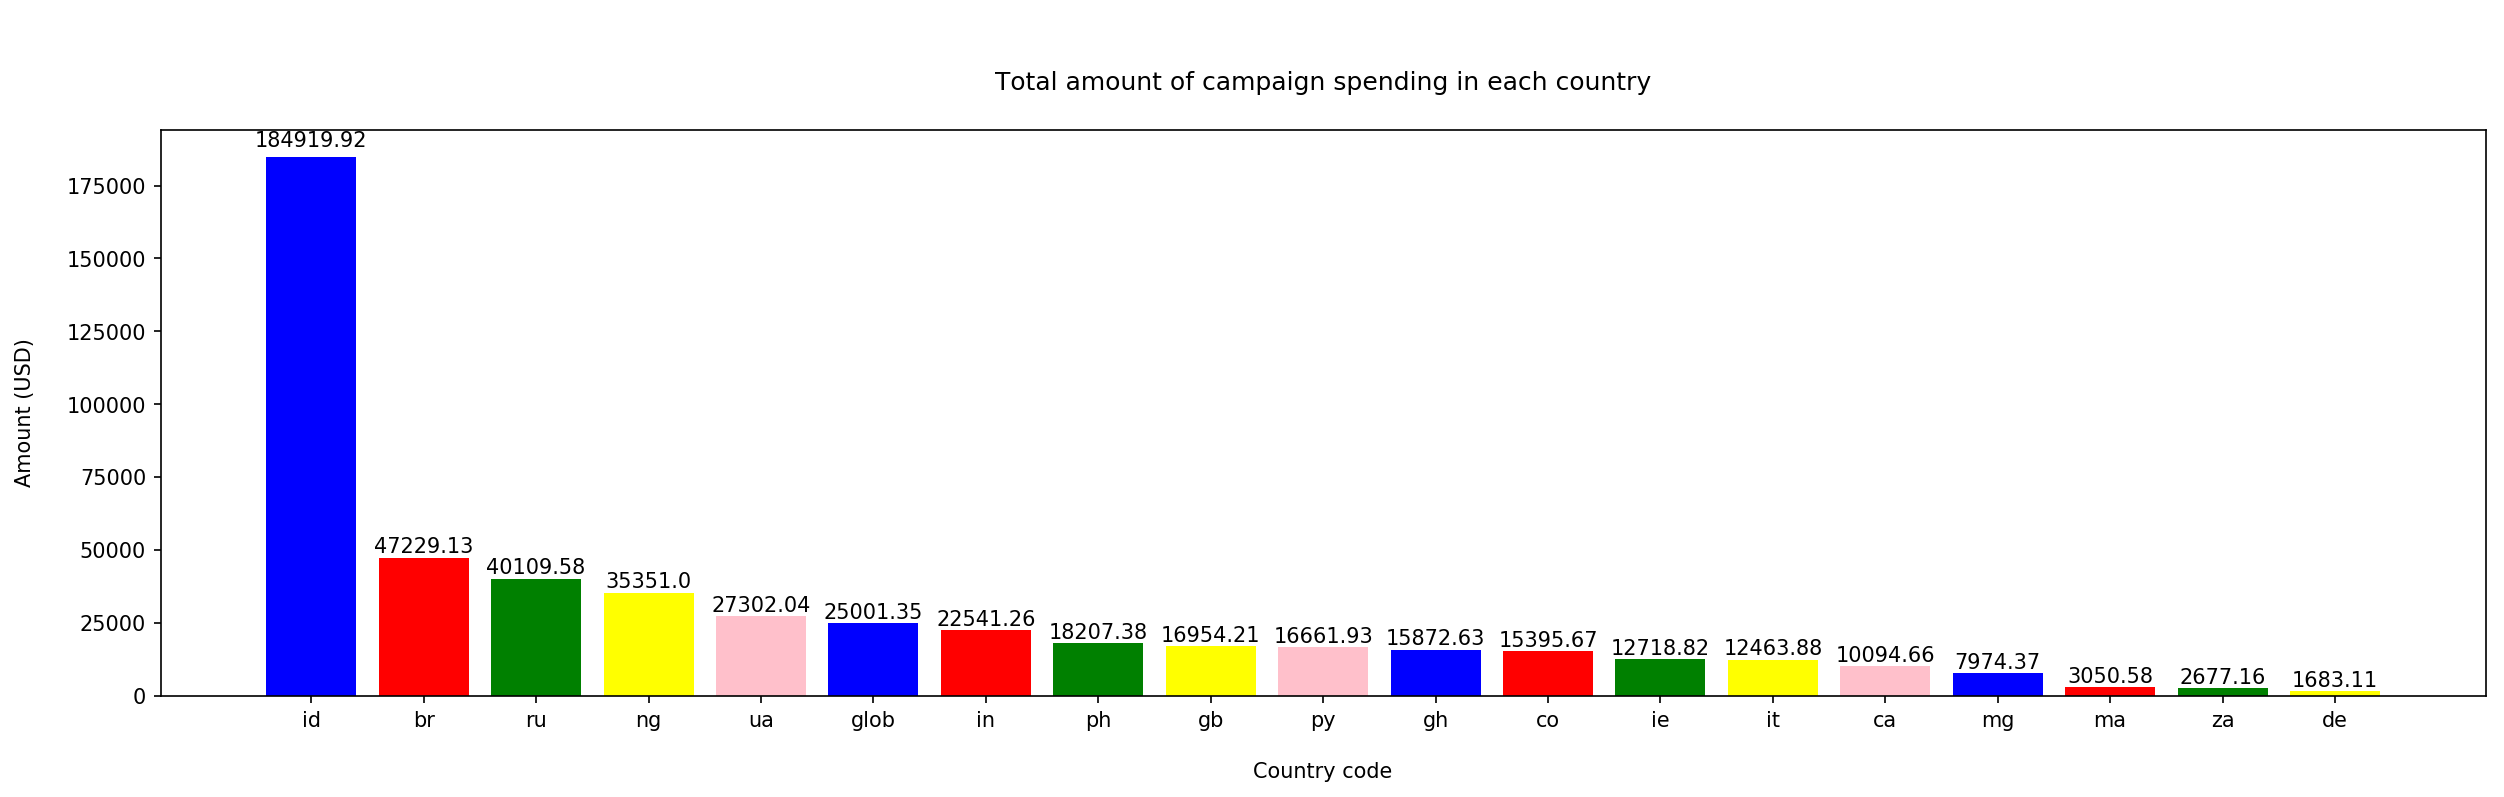

In [8]:
def autolabel(rects):
    offset = {'center': 0.5} 
    for rect in rects:
        height = rect.get_height()
        plt.text(rect.get_x() + rect.get_width()*offset['center'], 1.01*height,
                '{}'.format(height), ha='center', va='bottom')

x = np.arange(len(df_day))
y = df_day['count_day'].values
label = df_day['country'].values
colors = ['blue','red','green','yellow','pink']

plt.figure(dpi=150, figsize=(15,5))
plt.bar(x, y, color=colors)
plt.title('\n\nTotal campaign day in each country\n')
plt.xticks(x,label)
plt.xlabel('\nCountry code')
plt.ylabel('Total (Day)\n')

autolabel(plt.bar(x, y, color=colors))
plt.show()

x = np.arange(len(df_total_spend))
y = df_total_spend['country_spend'].values
label = df_total_spend['country'].values

plt.figure(dpi=150, figsize=(20,5))
plt.bar(x, y, color=colors)
plt.title('\n\nTotal amount of campaign spending in each country\n')
plt.xticks(x,label)
plt.xlabel('\nCountry code')
plt.ylabel('Amount (USD)\n')

autolabel(plt.bar(x, y, color=colors))
plt.show()

#### Findings
<p>The longest day with 39 number of days and the highest spending of campaign with 184919.92 USD is goes to Indonesia. South Africa and Great Britain have the least total day of campaign throughout the years which is only a day. Moreover, Germany is recorded the country that has the minimum expenses spending with only 1683.11 USD. 

<br>
#### Total coupon by account type

In [9]:
df_type = df_type.sort_values(by=['total_type'], ascending = False).reset_index(drop=True)
df_type = df_type.rename(columns={'total_type':'total_coupon'})

df_type

,type,total_coupon
0,type_6,3238
1,type_1,1630
2,type_3,50
3,type_2,35
4,type_4,32
5,type_7,9
6,type_5,5
7,type_0,1


<br>
#### Barchart visualization on total number for each account type

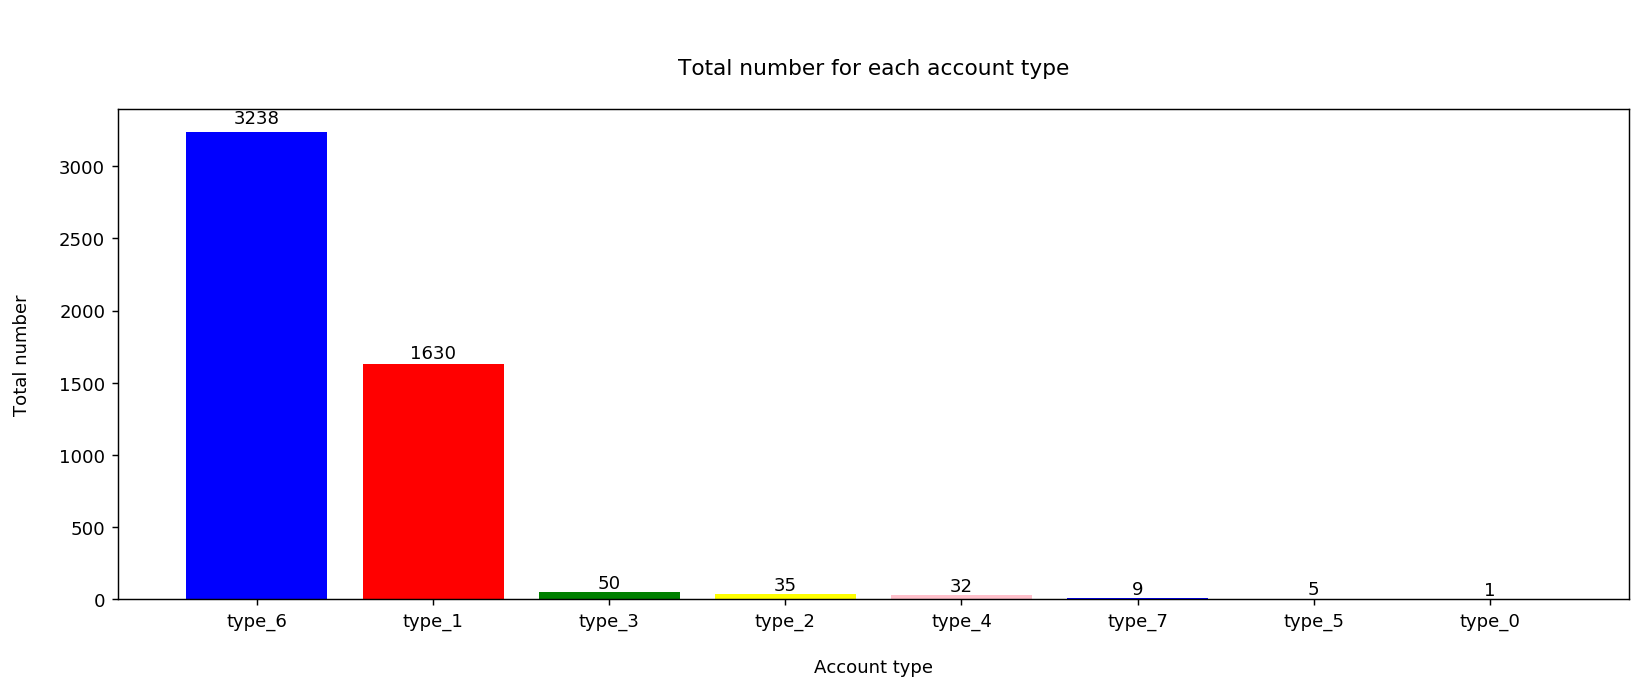

In [10]:
x = np.arange(len(df_type))
y = df_type['total_coupon'].values
label = df_type['type'].values
colors = ['blue','red','green','yellow','pink']

plt.figure(dpi=130, figsize=(15,5))
plt.bar(x, y, color=colors)
plt.title('\n\nTotal number for each account type\n')
plt.xticks(x,label)
plt.xlabel('\nAccount type')
plt.ylabel('Total number\n')

def autolabel(rects):
    offset = {'center': 0.5} 
    for rect in rects:
        height = rect.get_height()
        plt.text(rect.get_x() + rect.get_width()*offset['center'], 1.01*height,
                '{}'.format(height), ha='center', va='bottom')


autolabel(plt.bar(x, y, color=colors))
plt.show()

#### Findings
<p>Based on the barchart above, it shows that type_6 is the most popular and preferences from the clients with 3238 number of registered account. It is followed with type_1 and the total number account registered is 1630. Meanwhile, the other remaining account type seems to be significantly different compared to type_6 and type_1 where all registered client for each account are below 51 and the type_0 is recorded as the minimum number of registration with only have one account.  

<br>
#### Total coupon referred to indication coupon

In [11]:
df_top30coupon = df_coupon.head(30)

df_top30coupon  # only select top 30

,indication_coupon,total_coupon
0,308,4229
1,41,61
2,116,48
3,36,20
4,181,18
5,102,16
6,48,14
7,103,14
8,29,10
9,166,10


<br>
#### Barchart visualization on Top 30 ID with the highest number of coupon

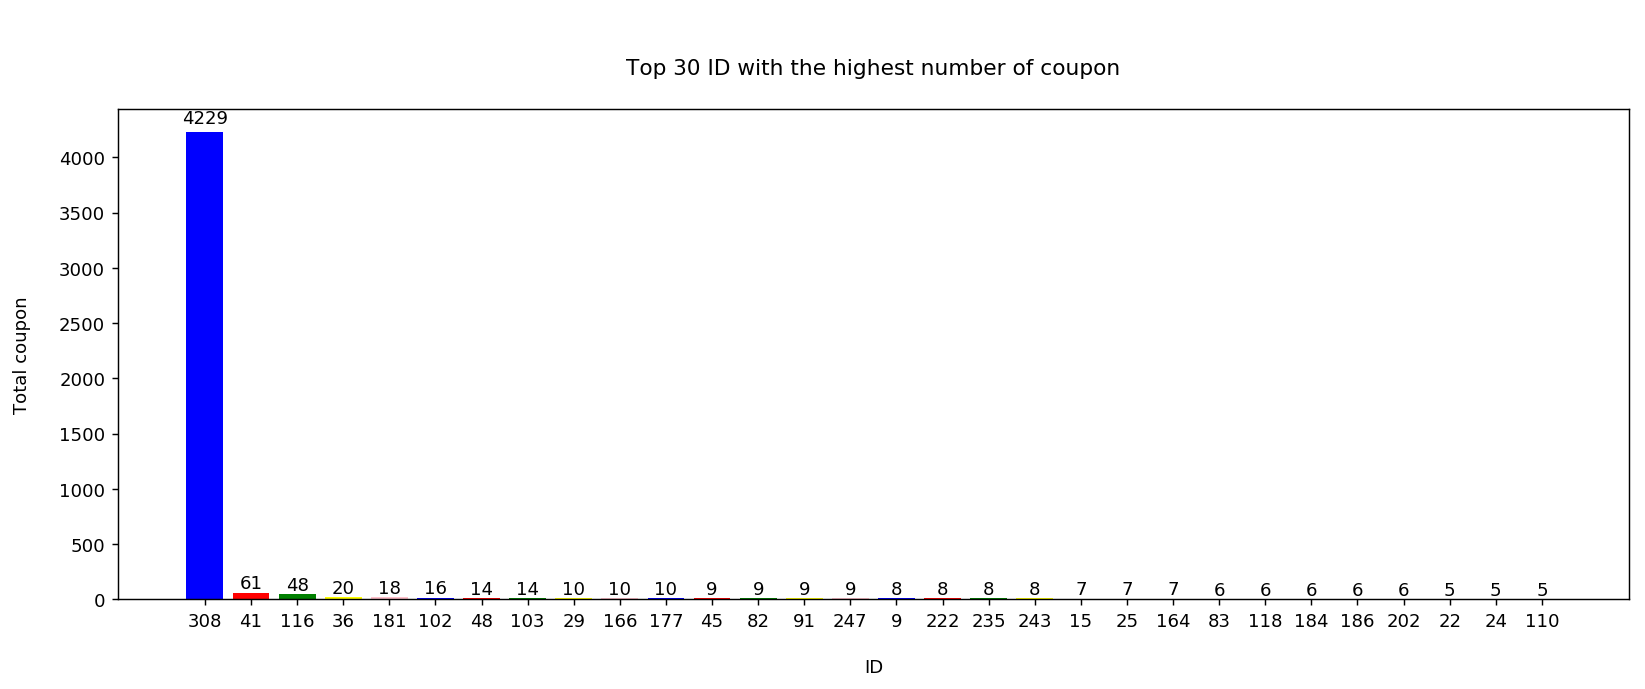

In [12]:
x = np.arange(len(df_top30coupon))
y = df_top30coupon['total_coupon'].values
label = df_top30coupon['indication_coupon'].values
colors = ['blue','red','green','yellow','pink']

plt.figure(dpi=130, figsize=(15,5))
plt.bar(x, y, color=colors)
plt.title('\n\nTop 30 ID with the highest number of coupon\n')
plt.xticks(x,label)
plt.xlabel('\nID')
plt.ylabel('Total coupon\n')

def autolabel(rects):
    offset = {'center': 0.5} 
    for rect in rects:
        height = rect.get_height()
        plt.text(rect.get_x() + rect.get_width()*offset['center'], 1.01*height,
                '{}'.format(height), ha='center', va='bottom')

autolabel(plt.bar(x, y, color=colors))
plt.show()

#### Findings
<p>The highest coupon obtained is goes to ID number 308 with the score 4229 number of coupons. However, it shows a huge difference to compare with the second highest that only reached 61 number of coupons. Hence, the other 28 remaining ID are all reaching not more that 50 total of coupon obtained. </p>